# AGS Example Notebook

Bring in AGS data and plot locations on map

In [37]:
# Install Libraries

%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install contextily
!pip install contextily
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
# Install Python AGS4
!pip install python_ags4
# Install Striplog
!pip install striplog

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-4mundv3k
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-4mundv3k
CPU times: user 228 ms, sys: 151 ms, total: 379 ms
Wall time: 27.7 s


In [38]:
# Import modules to Notebook
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
from pyproj.transformer import Transformer
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import python_ags4
from python_ags4 import AGS4
import striplog
from striplog import Legend, Lexicon, Interval, Component, Striplog

In [39]:
# Clone GitHub Repo with some example AGS files
!git clone --recursive https://github.com/BritishGeologicalSurvey/pyagsapi.git

# List available files in folder
!ls pyagsapi/test/files/real/

fatal: destination path 'pyagsapi' already exists and is not an empty directory.
 101145.ags
 132028.ags
 161-41.ags
 19-0217_PortadownFAS1_AGS_20200717.ags
'19-0869 - 2019-07-25 0958 - Final - 1.ags'
 19-0951_PFAS2_AGS_20200730.ags
'19-0952 - 2020-09-22 1648 - Final - 1.ags'
'19-1316 - 2020-03-02 1554 - Final - 1.ags'
'19-1381 - 2019-11-20 1311 - Internal - 1.ags'
 19-1541_LCRP1_AGS_20200804.ags
'19-1565 - 2020-03-02 1718 - Final - 1.ags'
 19684.ags
'1AB76CEF (2).ags'
 1-CO102748.002_NorthKelvinsideLogs.ags
'1-CO106833.007 - 2019-07-04 1120 - Final - 1.ags'
'1-CO106833.013_Cuthbertson Logs.ags'
'20-0071 - 2020-04-30 1103 - Final - 1.ags'
'20-0089 - 2020-04-08 0951 - Final - 1.ags'
'20-0090 - 2020-04-07 1249 - Final - 1.ags'
'20-0139 - 2020-04-03 1014 - Final - 1.ags'
'20-0183 - 2020-08-07 1044 - Final - 1.ags'
'20-0218 - 2020-08-13 1148 - Final - 1.ags'
'20-0408 - 2020-07-08 0755 - Final - 1.ags'
 20-1040_LurganFAS_AGS_20210301.ags
'205119F5 (2).ags'
'21-7-10-NLE(2).ags'
'22 Southwark

In [40]:
# Import AGS file to dataframe and convert float values to numeric
tables, headings = AGS4.AGS4_to_dataframe('pyagsapi/test/files/real/East West Rail BGS Pre October 2018 upload.ags')
tables['LOCA'] = AGS4.convert_to_numeric(tables['LOCA'])

In [41]:
# Review contents of LOCA table
tables['LOCA'].head()

,HEADING,LOCA_ID,LOCA_TYPE,LOCA_STAT,LOCA_NATE,LOCA_NATN,LOCA_GREF,LOCA_GL,LOCA_REM,LOCA_FDEP,LOCA_STAR,LOCA_PURP,LOCA_TERM,LOCA_ENDD,LOCA_LETT,LOCA_LOCX,LOCA_LOCY,LOCA_LOCZ,LOCA_LREF,LOCA_DATM,LOCA_ETRV,LOCA_NTRV,LOCA_LTRV,LOCA_XTRL,LOCA_YTRL,LOCA_ZTRL,LOCA_LAT,LOCA_LON,LOCA_ELAT,LOCA_ELON,LOCA_LLZ,LOCA_LOCM,LOCA_LOCA,LOCA_CLST,LOCA_ALID,LOCA_OFFS,LOCA_CNGE,LOCA_TRAN,FILE_FSET,LOCA_ORID,LOCA_ORJO,LOCA_ORCO,LOCA_CHKG,LOCA_APPG
0,DATA,CP2A15CE,CP-,,462741.00,223867.00,,75.20,Coordinates were provided by WSP/PB using a ha...,9.00,2015-06-03,,,2015-06-03,,179518.21,142411.95,NaN,,,462741.0,223867.0,75.2,NaN,NaN,NaN,,,,,,,,,,NaN,,,,,,,,
1,DATA,CP2A15CW,CP-,,462710.00,223859.00,,75.00,Hole refused at 9.6mbgl due to ground conditio...,9.85,2015-06-08,,,2015-06-10,,179487.13,142404.23,NaN,,,462710.0,223859.0,75.0,NaN,NaN,NaN,,,,,,,,,,NaN,,,,,,,,
2,DATA,CP2A4C,CP-,,468096.00,225585.00,,87.20,Coordinates were provided by WSP/PB using a ha...,20.00,2015-05-12,,,2015-05-13,,184890.60,144081.25,NaN,,,468096.0,225585.0,87.2,NaN,NaN,NaN,,,,,,,,,,NaN,,,,,,,,
3,DATA,CP2ACLOB_1D,DS+RC,,460162.80,222911.85,,69.82,EQUIPMENT: Hand digging tools. Comacchio MC305...,28.70,2017-11-01,,,2017-11-08,,176930.42,141480.22,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,NaN,,,,,,,,
4,DATA,CP2AGFFB_1U,DS+RC,,460978.04,223222.96,,68.09,EQUIPMENT: Hand digging tools. Comacchio MC305...,15.10,2018-07-06,,,2018-07-09,,177748.77,141783.93,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,NaN,,,,,,,,


In [42]:
# Extract geometry from LOCA table, specify XY columns and CRS to use in GeoDataFrame

location = tables['LOCA'].set_index('LOCA_ID')
location['geometry'] = list(zip(location['LOCA_NATE'], location['LOCA_NATN']))
location['geometry'] = location['geometry'].apply(Point)
location = gpd.GeoDataFrame(location, geometry='geometry', crs='EPSG:27700')

In [43]:
# Review provider options for basemap
cx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [44]:
# Review options for Openstreet Map 
cx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

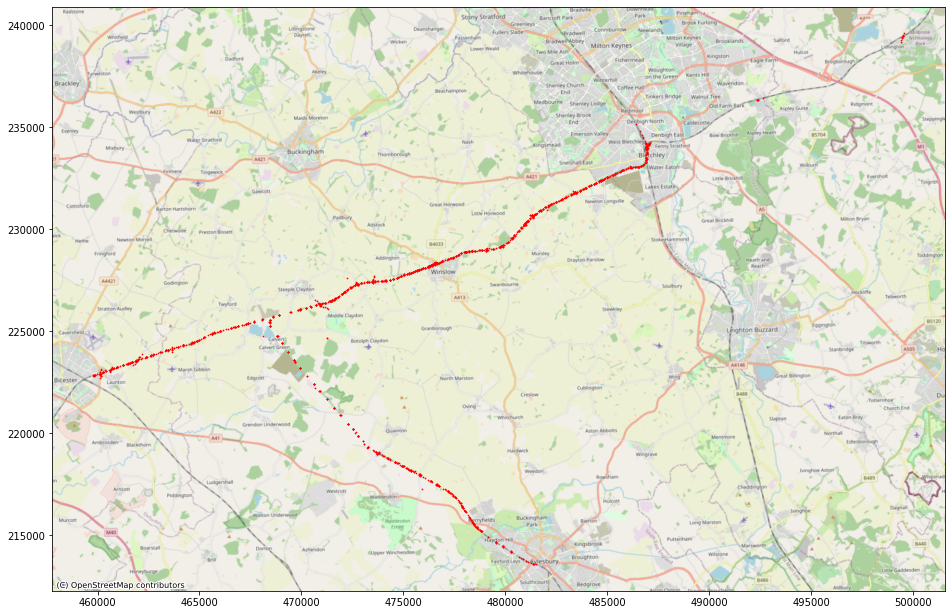

In [45]:
# Create the axis first
fig, ax = plt.subplots(figsize=(16, 20))

# Plot all boreholes
location.plot(markersize=0.5, color='red', ax=ax)

# Add Basemap
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, crs=location.crs.to_string(), zoom=12)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')


# Produce Strip Logs

Here we extract intervals from the GEOL table and plot a basic strip log using https://github.com/agile-geoscience/striplog   

In [46]:
# Review data in the GEOL table 
tables['GEOL'].head()

,HEADING,LOCA_ID,GEOL_TOP,GEOL_BASE,GEOL_DESC,GEOL_LEG,GEOL_GEOL,GEOL_GEO2,GEOL_STAT,GEOL_BGS,GEOL_FORM,GEOL_REM,FILE_FSET,GEOL_SDES,GEOL_GEO3
0,UNIT,,m,m,,,,,,,,,,,
1,TYPE,ID,2DP,2DP,X,PA,PA,PA,X,PA,X,X,X,X,PA
2,DATA,CP2A15CE,0.00,0.30,MADE GROUND: Dark brown sandy slightly silty a...,102,BLT,,,,,,,,
3,DATA,CP2A15CE,0.30,0.70,MADE GROUND: Light orangish brown slightly gra...,102,TBL,,,,,,,,
4,DATA,CP2A15CE,0.70,3.00,MADE GROUND: Stiff to very stiff dark brown CL...,102,SGF,,,,,,,,


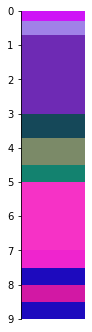

In [47]:
# Index data to LOCA_ID to allowing filtering
log = tables['GEOL'].set_index('LOCA_ID')

# Set borehole from the dataset
index = ['CP2A15CE']

# Filter Data by index
bhlog = log.loc[index]

# You will want a lexicon of some kind:
lexicon = Lexicon.default()

legend = Legend.default()

# We will then make a list of intervals from our data:
intervals = []
for top, base, description in bhlog['GEOL_TOP GEOL_BASE GEOL_DESC'.split()].values:
    intervals.append(Interval(top=top, base=base, description=description, lexicon=lexicon))

# Then make a striplog from the list:
slog = Striplog(list_of_Intervals=intervals) 

# Plot Lithology
slog.plot(ladder=True, aspect=3, ticks=1)

In [48]:
# Review what Lexicon pulled out from the GEOL_DESC column 
print(lexicon)

print(lexicon.lithology)

Lexicon('lithology': 19 items, 'modifier': 6 items, 'amount': 17 items, 'grainsize': 19 items, 'colour': 13 items, 'synonyms': 3 items, 'splitters': 3 items, 'parts_of_speech': 3 items, 'abbreviations': 1036 items, )
['overburden', 'sandstone', 'siltstone', 'shale', 'conglomerate', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders']
